In [73]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
# pylab.rcParams['figure.figsize'] = (8.0, 10.0)
  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [74]:
dataDir='D:/ML/data/coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [75]:
# 导入数据库
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.04s)
creating index...
index created!


In [76]:
# 显示数据集全部分类及super分类
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor electronic vehicle person outdoor kitchen sports accessory food appliance furniture animal


In [77]:
# 从满足特征标签的数据中随机选一个
catIds = coco.getCatIds(catNms=['person','bed','ball']);
print(catIds)   # [1, 18, 41]
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))]))
print(coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0])

[1, 65]
[71938, 223747, 455301, 252294, 61960, 297353, 415882, 273420, 422670, 551439, 458255, 137106, 554266, 290843, 51610, 254368, 270883, 366884, 521509, 347174, 345385, 460333, 332845, 317999, 190637, 40757, 518326, 542776, 355257, 565563, 553788, 506178, 218439, 469067, 170191, 414034, 451155, 532058, 73946, 557916, 46048, 468577, 393569, 200421, 536038, 226408, 171757, 99182, 578545, 239347, 169076, 35062, 111609, 449661, 199551]
[{'license': 2, 'file_name': '000000460333.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000460333.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-21 01:04:51', 'flickr_url': 'http://farm9.staticflickr.com/8457/7952261340_c1a243c043_z.jpg', 'id': 460333}]
{'license': 1, 'file_name': '000000273420.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000273420.jpg', 'height': 400, 'width': 500, 'date_captured': '2013-11-24 07:35:19', 'flickr_url': 'http://farm1.staticflickr.com/108/363783376_0b170b1135_z.jpg', 'id': 27342

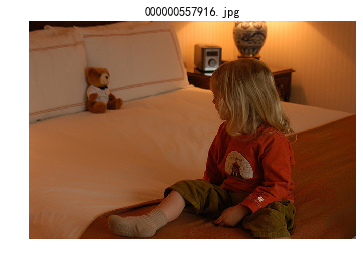

In [78]:
# 根据名称打开该图片
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# 根据网址下载该图片
I = io.imread(img['coco_url'])
plt.axis('off')
plt.title(img['file_name'])
plt.imshow(I)
plt.show()

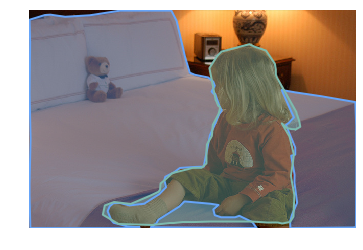

In [79]:
# 显示注释
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [80]:
# 导入人的keypoints
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


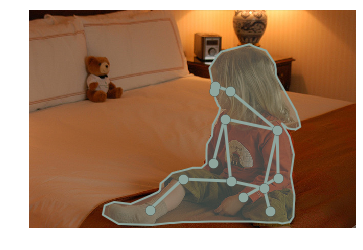

In [81]:
# 显示人的keypoints
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [82]:
# 导入描述
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [83]:
from googletrans import Translator
translator = Translator()
#导入google翻译

坐在床的末端的一个小女孩看玩具熊。
一个小女孩坐与玩具熊的一张床。
一个小孩子坐看玩具熊的床。
孩子坐看玩具熊的床。
一个女孩坐在一张床在一个房间里。
A little girl sitting at the end of a bed looking at a teddy bear.
A little girl sitting on a bed with a teddy bear.
A small child sitting on a bed looking at a teddy bear.
A child sitting on a bed looking at a teddy bear.
A girl sitting on a bed in a room.


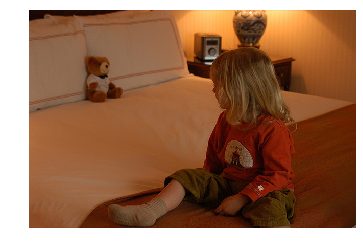

In [84]:
# 显示描述
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
for s in anns:#翻译描述内容 
    print(translator.translate(s['caption'], dest='zh-cn').text)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()